In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [2]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np # linear algebra
import pandas as pd

In [3]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../data/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('../data/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape


(3264, 150, 150, 3)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(150, 150, 3)))  # Specify input shape here
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
from keras import backend as K
from keras.utils import to_categorical

K.clear_session()  # Clear previous models

# Convert y_train if it's not already one-hot encoded
# Uncomment the next line if y_train has integer labels
# y_train = to_categorical(y_train, num_classes=4)  # Adjust 4 if you have a different number of classes

# Define the model
model = Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(Flatten())  # Flatten the input to (None, 150*150*3) before the Dense layer
model.add(Dense(4, activation='softmax'))  # Ensure the last layer matches your number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 3s 10ms/step - loss: 572.6409 - accuracy: 0.4635 - val_loss: 414.1529 - val_accuracy: 0.5272
Epoch 2/30
83/83 [==============================] - 0s 5ms/step - loss: 282.6624 - accuracy: 0.5970 - val_loss: 159.5782 - val_accuracy: 0.6871
Epoch 3/30
83/83 [==============================] - 0s 4ms/step - loss: 141.3065 - accuracy: 0.7072 - val_loss: 136.4518 - val_accuracy: 0.6905
Epoch 4/30
83/83 [==============================] - 0s 5ms/step - loss: 162.0233 - accuracy: 0.6984 - val_loss: 105.5051 - val_accuracy: 0.7313
Epoch 5/30
83/83 [==============================] - 0s 4ms/step - loss: 111.2138 - accuracy: 0.7393 - val_loss: 180.1517 - val_accuracy: 0.6531
Epoch 6/30
83/83 [==============================] - 0s 5ms/step - loss: 175.1160 - accuracy: 0.7098 - val_loss: 213.1463 - val_accuracy: 0.7143
Epoch 7/30
83/83 [==============================] - 0s 5ms/step - loss: 99.9201 - accuracy: 0.7976 - val_loss: 160.8719 - val_accuracy:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

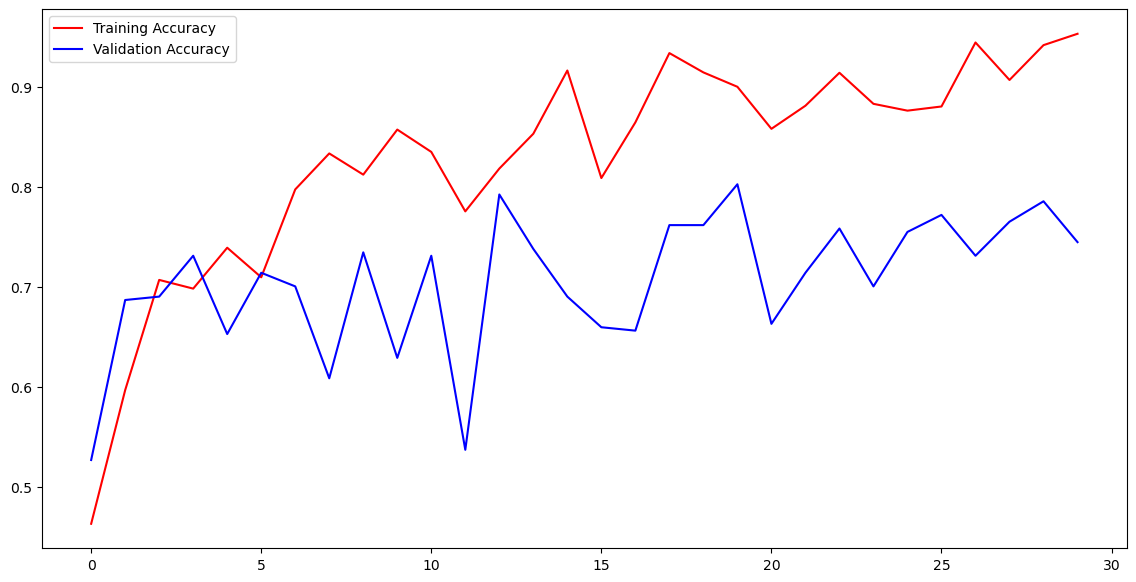

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

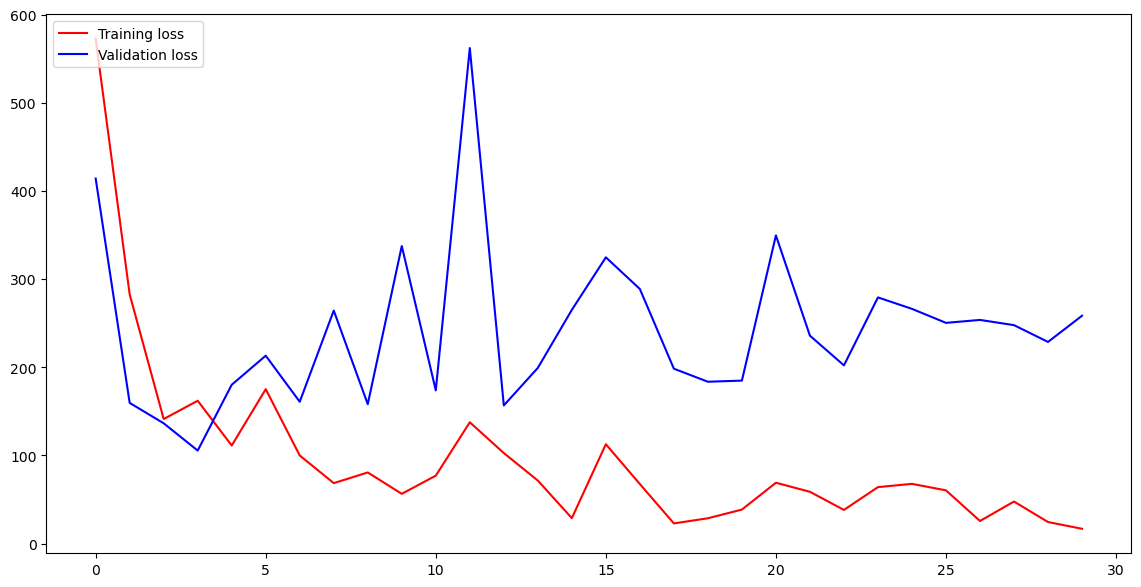

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [14]:
img = cv2.imread('../data/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [15]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

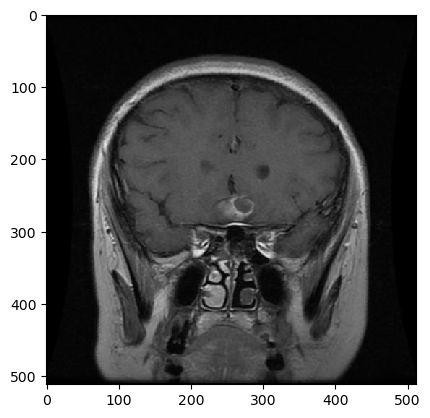

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../data/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [20]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 23ms/step


1

1/1 [==============================] - 0s 30ms/step


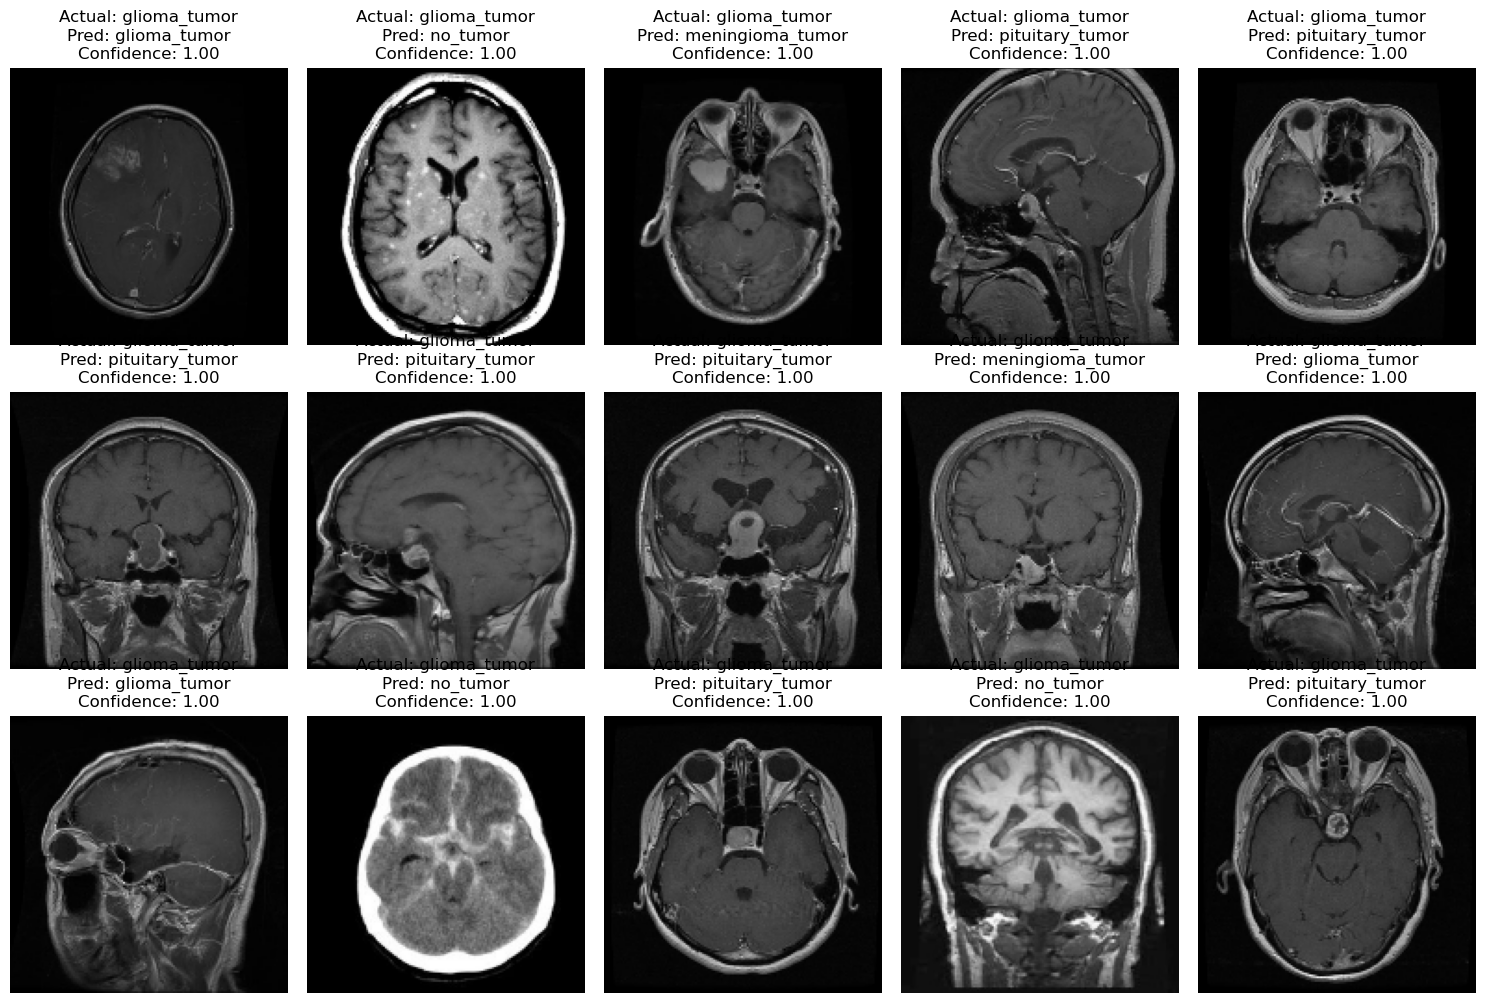

Image 1:
  Actual Class: glioma_tumor
  Predicted Class: glioma_tumor
  Confidence: 1.00

Image 2:
  Actual Class: glioma_tumor
  Predicted Class: no_tumor
  Confidence: 1.00

Image 3:
  Actual Class: glioma_tumor
  Predicted Class: meningioma_tumor
  Confidence: 1.00

Image 4:
  Actual Class: glioma_tumor
  Predicted Class: pituitary_tumor
  Confidence: 1.00

Image 5:
  Actual Class: glioma_tumor
  Predicted Class: pituitary_tumor
  Confidence: 1.00

Image 6:
  Actual Class: glioma_tumor
  Predicted Class: pituitary_tumor
  Confidence: 1.00

Image 7:
  Actual Class: glioma_tumor
  Predicted Class: pituitary_tumor
  Confidence: 1.00

Image 8:
  Actual Class: glioma_tumor
  Predicted Class: pituitary_tumor
  Confidence: 1.00

Image 9:
  Actual Class: glioma_tumor
  Predicted Class: meningioma_tumor
  Confidence: 1.00

Image 10:
  Actual Class: glioma_tumor
  Predicted Class: glioma_tumor
  Confidence: 1.00

Image 11:
  Actual Class: glioma_tumor
  Predicted Class: glioma_tumor
  Confide

In [18]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Select 15 random indices from the dataset
random_indices = random.sample(range(len(X_train)), 15)

# Initialize lists to store actual labels, predicted labels, and confidence
actual_labels = []
predicted_labels = []
confidence_scores = []

# Create a figure to display the images and results
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.ravel()

# Display 15 random images and show predictions
for i, idx in enumerate(random_indices):
    img = X_train[idx]
    actual_label = Y_train[idx]  # Actual label
    actual_label_name = labels[np.argmax(actual_label)]
    
    # Preprocess image (if necessary) and make prediction
    img_for_prediction = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img_for_prediction)
    predicted_label_idx = np.argmax(prediction, axis=1)[0]
    predicted_label_name = labels[predicted_label_idx]
    confidence = np.max(prediction)  # Highest confidence score

    # Append actual label, predicted label, and confidence
    actual_labels.append(actual_label_name)
    predicted_labels.append(predicted_label_name)
    confidence_scores.append(confidence)

    # Plot the image with predicted and actual labels
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Actual: {actual_label_name}\nPred: {predicted_label_name}\nConfidence: {confidence:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print the results
for i in range(15):
    print(f"Image {i+1}:")
    print(f"  Actual Class: {actual_labels[i]}")
    print(f"  Predicted Class: {predicted_labels[i]}")
    print(f"  Confidence: {confidence_scores[i]:.2f}\n")


In [21]:
import numpy as np
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Initialize lists for images and labels
X_train = []
Y_train = []

# Define image size and labels
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Load images and labels for training data
for i in labels:
    folderPath = os.path.join('../remdupdata/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

# Load images and labels for testing data
for i in labels:
    folderPath = os.path.join('../remdupdata/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Print lengths to check if they match
print(f"Length of X_train: {len(X_train)}")
print(f"Length of Y_train: {len(Y_train)}")

# Shuffle the data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Verify the length after shuffle
print(f"After shuffle - Length of X_train: {len(X_train)}")
print(f"After shuffle - Length of Y_train: {len(Y_train)}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Convert labels from string to integer
y_train_new = [labels.index(i) for i in y_train]
y_test_new = [labels.index(i) for i in y_test]

# Convert to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train_new)
y_test = tf.keras.utils.to_categorical(y_test_new)

# Verify the shapes of the final arrays
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Length of X_train: 3027
Length of Y_train: 3027
After shuffle - Length of X_train: 3027
After shuffle - Length of Y_train: 3027
Shape of X_train: (2724, 150, 150, 3)
Shape of y_train: (2724, 4)
Shape of X_test: (303, 150, 150, 3)
Shape of y_test: (303, 4)


10/10 [==============================] - 0s 16ms/step


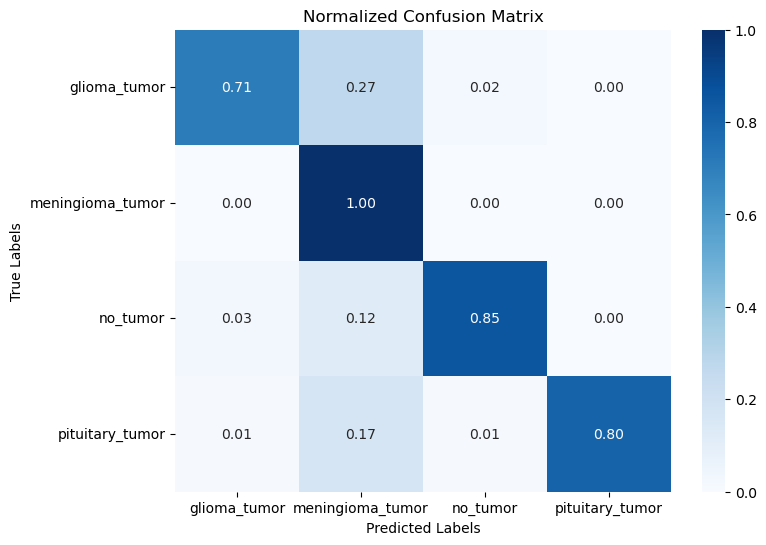

In [22]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the model is already trained and available as 'model'

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert y_test back from one-hot encoding to integer labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, predicted_classes)

# Normalize the confusion matrix by dividing each row by its sum
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


10/10 [==============================] - 0s 14ms/step
Accuracy: 0.8383
Precision (per class): [0.97142857 0.67647059 0.90625    1.        ]
Recall (per class): [0.70833333 1.         0.85294118 0.80246914]
F1 Score (per class): [0.81927711 0.80701754 0.87878788 0.89041096]


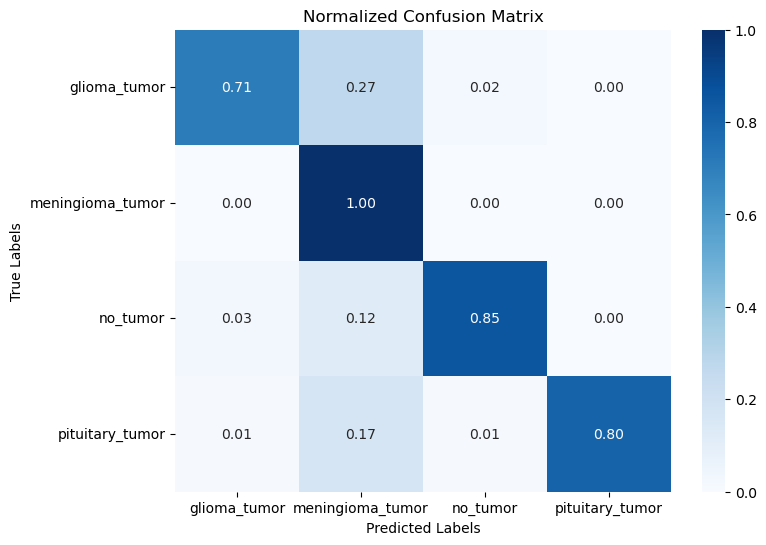

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the following variables are defined and model is trained:
# X_test, y_test, model, labels

# 1. Make predictions on the test set
predictions = model.predict(X_test)

# Convert predicted probabilities to class labels (indices of max values)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoding to integer labels
y_test_classes = np.argmax(y_test, axis=1)

# 2. Accuracy
accuracy = accuracy_score(y_test_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

# 3. Precision (for each class)
precision = precision_score(y_test_classes, predicted_classes, average=None)
print(f"Precision (per class): {precision}")

# 4. Recall (for each class)
recall = recall_score(y_test_classes, predicted_classes, average=None)
print(f"Recall (per class): {recall}")

# 5. F1 Score (for each class)
f1 = f1_score(y_test_classes, predicted_classes, average=None)
print(f"F1 Score (per class): {f1}")

# 6. Confusion Matrix
cm = confusion_matrix(y_test_classes, predicted_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [46]:
model.save(f"../models/1")

INFO:tensorflow:Assets written to: ../models/1\assets
